In [41]:
import numpy as np
from helpers import *
from implementations import *

In [42]:
# loading train data (takes 10 secs, avoid spamming cell)

yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb, [N,1])

In [43]:
# standardize data without the incomplete points, calculations done on _rem arrays (with -999 lines removed)
idx_incomplete_points = np.nonzero(input_data[:,4]==-999)

tx_rem = np.delete(input_data,idx_incomplete_points,0)
y_rem = np.delete(yb,idx_incomplete_points)

means = np.mean(tx_rem, axis=0)
means = means * np.ones(np.shape(tx_rem))
tx_rem_std = tx_rem - means

std_dev = np.std(tx_rem, axis=0)
std_dev = std_dev * np.ones(np.shape(tx_rem))
tx_rem_std = tx_rem_std / std_dev       # np.mean(tx_rem_std) should be ~0, np.std(tx_rem_std) should be 1


In [68]:
np.shape(tx_rem_std)
np.mean(tx_rem_std)
np.std(tx_rem_std)


1.000000000000008

In [62]:
tx_train = tx_rem_std[range(1000),:]  # 1000x30 data for faster testing of regression
y_train = yb[0:1000]
y_train = np.reshape(y_train, [1000,1])
print(y_train)
y_test[y_test==-1]= 0
yb[yb==-1] = 0
print(y_train)
# generate random indices
ratio = 0.8
num_row = len(y_train)
indices = np.random.permutation(num_row)
index_split = int(np.floor(ratio * num_row))
index_tr = indices[: index_split]
index_te = indices[index_split:]
# create split
x_tr = tx_train[index_tr]
x_te = tx_train[index_te]
y_tr = y_train[index_tr]
y_te = y_train[index_te]
print(y_te)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.

In [63]:
initial_w = np.ones([30,1])
max_iters = 100
gamma = 0.7
w_opt,loss = logistic_regression(y_test,tx_test,initial_w,max_iters,gamma)
w_opt2,loss2 = reg_logistic_regression(y_test, tx_test, 0.00014, initial_w, max_iters, gamma)

In [64]:
np.shape(initial_w)

(30, 1)

In [65]:
np.shape(w_opt)

(30, 1)

In [66]:
print(loss)
print(loss2)

0.6802788703131705
0.6802642245125924


In [50]:
#w_opt,loss = logistic_regression(y_rem,tx_rem_std,initial_w,max_iters,gamma)

For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00014 with a test rmse of 0.677
0.6773797152912481


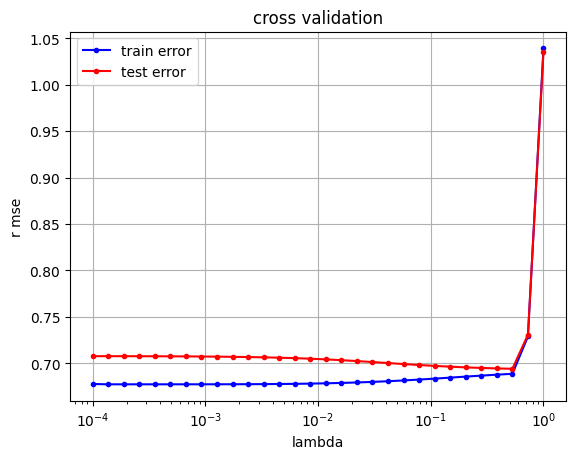

In [67]:
initial_w = np.ones([30,1])   #start with least square
max_iters = 70
gamma = 0.7
best_lambda, best_rmse = cross_validation_demo(y_test, tx_test, 7, 4,initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters )
print(best_rmse)

In [69]:
#best_degree_selection(y_test,tx_test,np.arange(2,11), 4, np.logspace(-2, 0, 50), initial_w, gamma,max_iters)


In [70]:
def euclidean_distance(x1,x2):
    'computes the euclidean distance between two vectors or scalars'
    distance = 0
    for x in range(len(x1)):
        distance += pow((x1[x] - x2[x]), 2)
    return np.sqrt(distance)

    #return np.sqrt(sum((x1-x2)**2))              #does this suffice??

In [89]:
def get_Kneighbors(x_tr, K, new_sample):
    'finds K nearest neighbors using euclidian distance'
    samples = np.shape(x_tr)[0] 
    neighbors = np.zeros((samples,1))
    Kneighbors = np.zeros((K,1))
    Kindexes = np.zeros((K,1))
    
    for i in range (samples):
        neighbors[i] = euclidean_distance(x_tr[i,:], new_sample)
        
    #print(neighbors)    
    for j in range (K):
        Kneighbors[j] = min(neighbors)
        idx = np.argmin(neighbors)
        #remove for the next iteration the last smallest value:
        Kindexes[j] = idx
        neighbors = np.delete(neighbors, idx)
        
    return Kneighbors, Kindexes   

In [90]:
def get_prediction(Kindexes, K):
    'predicts y = 0 or 1 using the prediction of K-nearest neighbors'
    predictions = np.zeros((K,1))
    for m in range (K):
        predictions[m] = y_tr[np.int(Kindexes[m])]  #warning because of forced int()

    if sum(predictions)>=3:
        new_prediction = 1
    else:
        new_prediction = 0
    return predictions, new_prediction

In [91]:
# trying classification : KNN
K = 5 
new_sample = x_te[25,:]
# add def get_accuracy(): to check if prediction is correct? 
  
Kneighbors, Kindexes = get_Kneighbors(x_tr, K, new_sample)
predictions, new_prediction = get_prediction(Kindexes, K)     #pas besoin de return predictions ici

print(Kneighbors)
print(Kindexes) 
print(predictions) 
print(new_prediction)

[[2.60707848]
 [3.45665147]
 [3.54254419]
 [3.74710524]
 [3.90167671]]
[[131.]
 [294.]
 [293.]
 [795.]
 [754.]]
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]
0


/tmp/ipykernel_73/3086196265.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions[m] = y_tr[np.int(Kindexes[m])]  #warning because of forced int()


In [57]:
# trying max margin separation hyper plane ?   TRY OTHER CLASSIFICATION AND GENERALISER A MATRICE  
#or k means (centre de deux groupes)

In [58]:
# using classification_by_least_square

In [59]:
# Using classification_by_logistic_regression_gradient_descent

In [60]:
# Using classification_by_logistic_regression_newton_method

In [61]:
# using classification_by_logistic_regression_penalized_gradient_descent (with reg logictic regression)
#wopt, loss = reg_logistic_regression(y_tr, x_tr, best_lambda, initial_w, max_iters, gamma)
#ran earlier
